# 图像分类——ResNet

本范例我们使用ResNet实现对小猫和小狗图片的图像分类。

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from PIL import Image 

import torch
from torch import nn
import torchvision
from torchvision import datasets, models, transforms

import datetime
import os
import copy
import shutil
from pathlib import Path


In [3]:
from argparse import Namespace

config = Namespace(
    img_size = 256, 
    lr = 1e-3,
    batch_size = 32,
)


In [2]:
import sys 
sys.path.insert(0,'../../torchkeras')

from torchkeras.models import ResNet50 


## 一，准备数据

In [5]:
data_url = 'https://github.com/lyhue1991/torchkeras/releases/download/v3.7.2/cats_vs_dogs.zip'
data_file = 'cats_vs_dogs.zip'

if not os.path.exists(data_file):
    torch.hub.download_url_to_file(data_url,data_file)
    shutil.unpack_archive(data_file,'datasets')
    

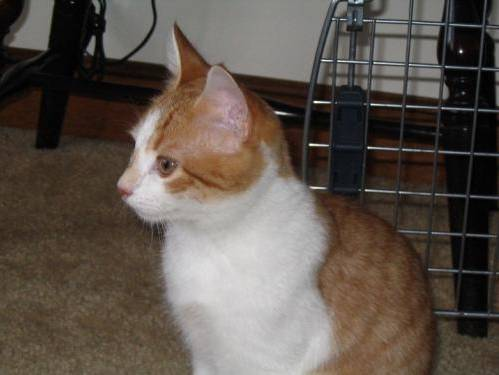

In [4]:

data_path = './datasets/cats_vs_dogs'

train_cats = os.listdir(os.path.join(data_path,"train","cats"))
img = Image.open(os.path.join(os.path.join(data_path,"train","cats",train_cats[0])))
img 

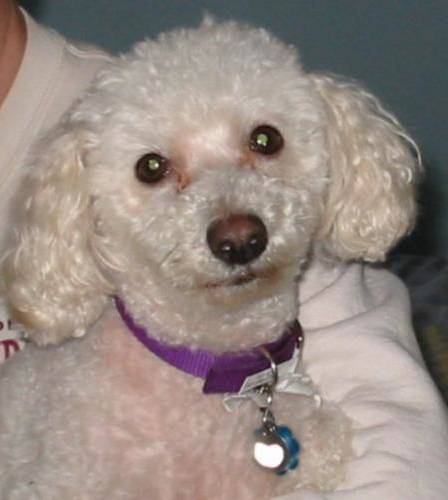

In [5]:
train_dogs = os.listdir(os.path.join(data_path,"train","dogs"))
img = Image.open(os.path.join(os.path.join(data_path,"train","dogs",train_dogs[0])))
img 


In [6]:
transforms_train = transforms.Compose([
        transforms.Resize((config.img_size,config.img_size)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
        transforms.Normalizelize
    ])
transforms_val = transforms.Compose([
        transforms.Resize((config.img_size,config.img_size)),
        transforms.ToTensor(),
    ])

def transform_label(x):
    return  torch.tensor([x],dtype = torch.float)
    
    
ds_train = datasets.ImageFolder(os.path.join(data_path,"train"),transforms_train,
            target_transform = transform_label)
ds_val = datasets.ImageFolder(os.path.join(data_path,"val"),transforms_val,
          target_transform = transform_label)

dl_train = torch.utils.data.DataLoader(ds_train, batch_size=config.batch_size,
                                             shuffle=True)
dl_val = torch.utils.data.DataLoader(ds_val, batch_size=config.batch_size,
                                             shuffle=False)

class_names = ds_train.classes

print(len(ds_train))
print(len(ds_val))


2000
995


array([ 827,  407,  879, 1184,  287,  924,  253, 1391,  474])

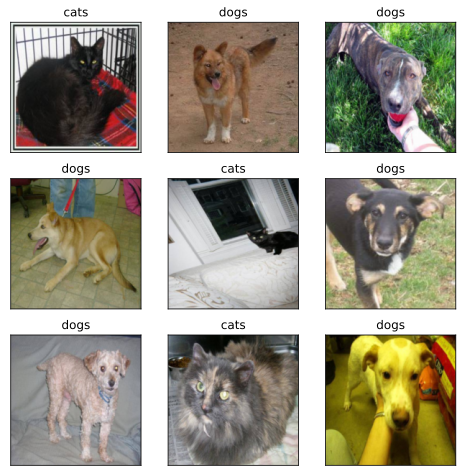

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize=(8,8)) 
idxes = np.random.choice(range(len(ds_train)),9)

for i in range(9):
    idx = idxes[i]
    img,label = ds_train[idx]
    img = img.permute(1,2,0)
    ax=plt.subplot(3,3,i+1)
    ax.imshow(img.numpy())
    ax.set_title(f"{class_names[label.int().item()]}")
    ax.set_xticks([])
    ax.set_yticks([]) 
plt.show()



## 二，构建模型

In [10]:
for features,labels in dl_train:
    break 

In [11]:
from torchkeras import summary 

net = ResNet50(num_classes=1)

summary(net,input_data=features);


--------------------------------------------------------------------------
Layer (type)                            Output Shape              Param #
Conv2d-1                          [-1, 64, 128, 128]                9,408
BatchNorm2d-2                     [-1, 64, 128, 128]                  128
ReLU-3                            [-1, 64, 128, 128]                    0
MaxPool2d-4                         [-1, 64, 64, 64]                    0
Conv2d-5                           [-1, 256, 64, 64]               16,384
BatchNorm2d-6                      [-1, 256, 64, 64]                  512
Conv2d-7                            [-1, 64, 64, 64]                4,096
BatchNorm2d-8                       [-1, 64, 64, 64]                  128
ReLU-9                              [-1, 64, 64, 64]                    0
Conv2d-10                           [-1, 64, 64, 64]               36,864
BatchNorm2d-11                      [-1, 64, 64, 64]                  128
ReLU-12                             [

## 三，训练模型

In [14]:
from torchkeras import KerasModel 
from torchmetrics import Accuracy


loss_fn = nn.BCEWithLogitsLoss()
metrics_dict = {"acc":Accuracy(task='binary')}

optimizer = torch.optim.SGD(net.parameters(),
                            lr=config.lr, momentum=0.9)

model = KerasModel(net,
                   loss_fn = loss_fn,
                   metrics_dict= metrics_dict,
                   optimizer = optimizer
                  )     



<<<<<< 🐌 cpu is used >>>>>>


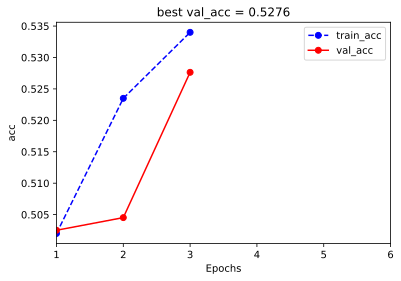

epoch,train_loss,train_acc,lr,val_loss,val_acc
1.0,0.7242268702340504,0.5019999742507935,0.001,0.7544655166566372,0.5025125741958618
2.0,0.7166441972293551,0.5235000252723694,0.001,0.8011191331315786,0.5045226216316223
3.0,0.7066147989696927,0.5339999794960022,0.001,0.7081100810319185,0.5276381969451904



================================================================================2023-03-04 16:45:56
Epoch 1 / 6

100%|████████████████████████████████| 32/32 [02:17<00:00,  4.28s/it, val_acc=0.503, val_loss=0.754]
<<<<<< reach best val_acc : 0.5025125741958618 >>>>>>

================================================================================2023-03-04 16:56:40
Epoch 2 / 6

100%|████████████████████████████████| 32/32 [02:14<00:00,  4.21s/it, val_acc=0.505, val_loss=0.801]
<<<<<< reach best val_acc : 0.5045226216316223 >>>>>>

================================================================================2023-03-04 17:07:09
Epoch 3 / 6

100%|████████████████████████████████| 32/32 [25:43<00:00, 48.22s/it, val_acc=0.528, val_loss=0.708]
<<<<<< reach best val_acc : 0.5276381969451904 >>>>>>

================================================================================2023-03-04 19:30:55
Epoch 4 / 6

 52%|█████████▍        | 33/63 [04:28<04:04,  8.13s/it, lr=0.001, train_acc=0.6

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /var/folders/s4/ttc61tl56lvcn5gbyxqvwst40000gp/T/ipykernel_73927/2840684716.py:5 in <module>     │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ '/var/folders/s4/ttc61tl56lvcn5gbyxqvwst40000gp/T/ipykernel_73927/2840684716.py'                 │
│                                                                                                  │
│ /Users/liangyun2/CodeFiles/torchkeras/examples/../../torchkeras/torchkeras/kerasmodel.py:164 in  │
│ fit                                                                                              │
│                                                                                                  │
│   161 │   │   │                                                                                  │
│   162 │   │   │   train_epoch_runner = self.EpochRunner(train_step_runner,should_quiet)          │
│   163 │   │   │   train_metrics = {'epoch':epoch}                                                │
│ ❱ 164 │   │   │   train_metrics.update(train_epoch_runner(train_dataloader))                     │
│   165 │   │   │                                                                                  │
│   166 │   │   │   for name, metric in train_metrics.items():                                     │
│   167 │   │   │   │   self.history[name] = self.history.get(name, []) + [metric]                 │
│                                                                                                  │
│ /Users/liangyun2/CodeFiles/torchkeras/examples/../../torchkeras/torchkeras/kerasmodel.py:78 in   │
│ __call__                                                                                         │
│                                                                                                  │
│    75 │   │   epoch_losses = {}                                                                  │
│    76 │   │   for step, batch in loop:                                                           │
│    77 │   │   │   if self.stage=="train":                                                        │
│ ❱  78 │   │   │   │   step_losses,step_metrics = self.steprunner(batch)                          │
│    79 │   │   │   else:                                                                          │
│    80 │   │   │   │   with torch.no_grad():                                                      │
│    81 │   │   │   │   │   step_losses,step_metrics = self.steprunner(batch)                      │
│                                                                                                  │
│ /Users/liangyun2/CodeFiles/torchkeras/examples/../../torchkeras/torchkeras/kerasmodel.py:32 in   │
│ __call__                                                                                         │
│                                                                                                  │
│    29 │   │   features,labels = batch                                                            │
│    30 │   │                                                                                      │
│    31 │   │   #loss                                                                              │
│ ❱  32 │   │   preds = self.net(features)                                                         │
│    33 │   │   loss = self.loss_fn(preds,labels)                                                  │
│    34 │   │                                                                                      │
│    35 │   │   #backward()                                                                        │
│                                                                                                  │
│ /Users/liangyun2/miniforge3/envs/tf26/lib/python3.9/site-pa

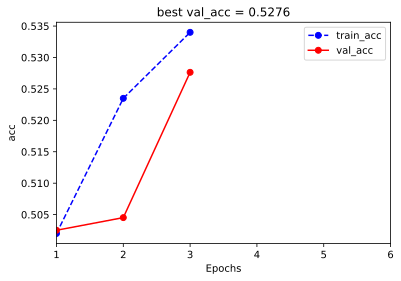

In [16]:
from torchkeras.kerascallbacks import WandbCallback



dfhistory=model.fit(train_data=dl_train, 
                    val_data=dl_val, 
                    epochs=6, 
                    ckpt_path='checkpoint.pt',
                    patience=2, 
                    monitor="val_acc",
                    mode="max",
                    mixed_precision='no',
                    plot = True
                   )



## 四，评估模型

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
def plot_metric(dfhistory, metric):
    train_metrics = dfhistory["train_"+metric]
    val_metrics = dfhistory['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
    

In [ ]:
plot_metric(dfhistory,"loss")

In [ ]:
plot_metric(dfhistory,"acc")

In [ ]:
model.evaluate(dl_val)

## 五，使用模型

## 六，保存模型


